In [1]:
# Plotting electrochemical data from Biologic data files
# Data collection cycle: Positive CP --> EIS --> Negative CP --> EIS

In [12]:
import numpy as np
import eclabfiles as ecf
import matplotlib.pyplot as plt
import pandas as pd
from colour import Color
import matplotlib.ticker as tick

%matplotlib inline

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

In [49]:
# import data files
# ecf.to_df reads .mpr files and imports them as dataframes

# chronopotentiometry data
pos_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_02_CP_C01.mpr")
neg_CP = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_04_CP_C01.mpr")

# EIS data
#PEIS_A = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_03_PEIS_C01.mpr")
#PEIS_B = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell5_Li2-7In0-7Zr0-3Cl6/echem_cell5/operando/In7Zr3_cell5_100uA_05_PEIS_C01.mpr")

PEIS_A = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell6_Li2-7Sc0-7Zr0-3Cl6/echem_cell6/Cycling/Sc7Zr3_cell5_100uA_03_PEIS_C01.mpr")
PEIS_B = ecf.to_df(r"C:/Users/sincl/Documents/MaughanLab/11-ID-B/Operando_XPDF_Dec2022/cell6_Li2-7Sc0-7Zr0-3Cl6/echem_cell6/Cycling/Sc7Zr3_cell5_100uA_05_PEIS_C01.mpr")

In [14]:
# Plotting chronopotentiometry

In [15]:
# separates each CP curve (all CP data is collected into one data file)
# "1201" value is dependent on cycle length

# counts the number of total data points
num_rows_pos = len(pos_CP)
num_rows_neg = len(neg_CP)

# calculates number of CP cycles
num_cycles_pos = int(num_rows_pos/1201)
num_cycles_neg = int(num_rows_neg/1201)

# creates lists to store separated CP cycles
CP_cycles_pos = {}
CP_cycles_neg = {}

# adds a new item to positive CP list for each individual cycle
for i in range(0, num_cycles_pos):
    CP_cycles_pos[i] = pos_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# adds a new item to negative CP list for each individual cycle
for i in range(0, num_cycles_neg):
    CP_cycles_neg[i] = neg_CP.truncate(before=0 + (1201*i), after=1200 + (1201*i))

# should have whole numbers here
print(num_cycles_pos)
print(num_cycles_neg)

28
28


In [16]:
# generates color gradient list with same number of colors as there are CP cycles
start_color = Color("#ff0000")
colors_cp = list(start_color.range_to(Color("#962fbf"), num_cycles_pos))

Text(-1000, -0.25, '$j=100$ $\\mu$A$\\cdot$cm$^{-2}$')

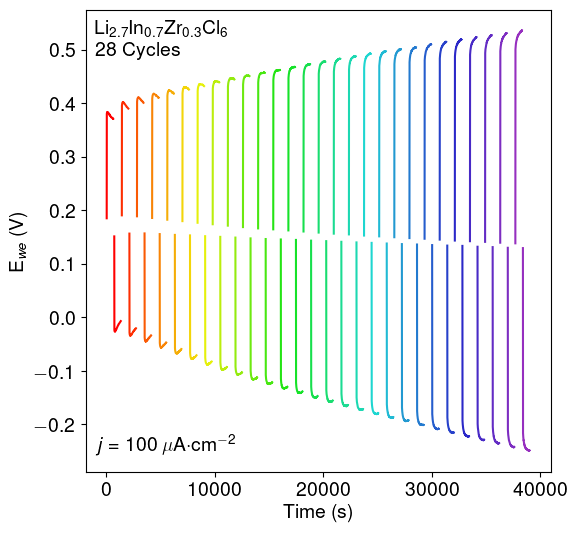

In [17]:
# generates plot
fig, cp_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each positive cycle
for i in CP_cycles_pos:
    cp_plot.plot(CP_cycles_pos[i]["time"], CP_cycles_pos[i]["<Ewe>"], color = colors_cp[i].hex)

# plot each negative cycle
for i in CP_cycles_neg:
    cp_plot.plot(CP_cycles_neg[i]["time"], CP_cycles_neg[i]["<Ewe>"], color = colors_cp[i].hex)

# set axis labels
cp_plot.set_ylabel("E$_{we}$ (V)")
cp_plot.set_xlabel("Time (s)")

# set title
cp_plot.text(-1000, 0.53, "Li$_{2.7}$In$_{0.7}$Zr$_{0.3}$Cl$_6$")

# add text for number of cycles
cp_plot.text(-1000, 0.49, "28 Cycles")

# add text for current density
cp_plot.text(-1000, -0.25, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell6_CP.png",bbox_inches='tight',dpi=1000) 

In [18]:
#Plotting EIS

In [89]:
# sort dataset chronologically

PEIS = PEIS_A
PEIS.sort_values(by=["time"])

,freq,Re(Z),-Im(Z),|Z|,Phase(Z),time,<Ewe>,<I>,Cs,Cp,...,|Ewe h5|,|Ewe h6|,|Ewe h7|,|I h2|,|I h3|,|I h4|,|I h5|,|I h6|,|I h7|,uts
0,2.000018e+06,2177.227295,1271.939209,2521.536865,-30.293531,615.895537,-0.002927,0.000057,0.000063,0.000016,...,0.000029,0.000019,0.000017,9.188602e-08,2.057168e-08,1.353957e-07,9.511595e-08,2.373064e-07,6.053602e-08,1.670734e+09
1,1.349892e+06,2487.666504,1365.285034,2837.690674,-28.758928,616.762530,-0.002912,0.000061,0.000086,0.000020,...,0.000027,0.000035,0.000012,1.271871e-07,1.224499e-07,3.239735e-07,1.313688e-07,3.812033e-07,8.794036e-08,1.670734e+09
2,9.111027e+05,2963.328857,1518.496216,3329.737061,-27.131926,617.629516,-0.002925,0.000081,0.000115,0.000024,...,0.000049,0.000046,0.000013,1.271187e-07,2.208062e-07,1.442658e-07,2.925737e-07,3.174935e-07,9.521172e-08,1.670734e+09
3,6.149421e+05,3333.150635,1473.730103,3644.416748,-23.852295,618.496528,-0.002905,0.000062,0.000176,0.000029,...,0.000018,0.000019,0.000025,4.526846e-08,4.363951e-08,1.988091e-07,8.266620e-08,2.561607e-07,1.748731e-07,1.670734e+09
4,4.150553e+05,3663.210449,1570.949097,3985.848877,-23.211828,619.362534,-0.002912,0.000070,0.000244,0.000038,...,0.000021,0.000020,0.000028,2.516728e-08,5.850728e-08,2.503619e-08,5.282092e-08,4.486442e-08,1.282378e-07,1.670734e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,9.640902e-01,62078.707031,321.806396,62079.542969,-0.297010,18840.475635,0.001954,0.000150,512.988647,0.013785,...,0.000018,0.000014,0.000009,1.510866e-10,1.513381e-10,7.804315e-11,1.172745e-10,8.531399e-11,8.618525e-11,1.670752e+09
584,6.503910e-01,62119.957031,238.467834,62120.414062,-0.219948,18847.061180,0.001959,0.000154,1026.161743,0.015122,...,0.000012,0.000006,0.000006,1.221984e-10,1.457377e-10,1.031449e-10,1.702892e-10,5.864993e-11,7.242900e-11,1.670752e+09
585,4.392251e-01,62725.769531,88.738625,62725.832031,-0.081057,18856.712173,0.001952,0.000159,4083.384277,0.008172,...,0.000006,0.000007,0.000006,2.967467e-10,1.956227e-10,1.136137e-10,1.288406e-10,1.058200e-10,6.860271e-11,1.670752e+09
586,2.964899e-01,63247.253906,160.225647,63247.457031,-0.145148,18870.911233,0.001948,0.000169,3350.257568,0.021501,...,0.000006,0.000015,0.000018,4.139226e-10,3.593012e-10,2.156446e-10,2.447586e-10,1.402135e-10,1.207743e-10,1.670752e+09


In [90]:
# separate cycles

# counts the number of total data points
num_rows = len(PEIS)

# calculates number of EIS cycles
num_cycles = int(num_rows / 42)

# creates lists to store separated EIS cycles
PEIS_cycles = {}

# adds a new item to EIS list for each individual cycle
for i in range(0, num_cycles):
    PEIS_cycles[i] = PEIS.truncate(before=0 + (42*i), after=41 + (42*i))
    
# should have whole number here
print(num_cycles)

14


In [91]:
# generates color gradient list with same number of colors as there are EIS cycles
start_color = Color("#ff0000")
colors_eis = list(start_color.range_to(Color("#962fbf"), num_cycles))

In [92]:
def reformat_large_tick_values(tick_val, pos):
    if tick_val >= 1000:
        new_tick_format = round(tick_val/1000, 1)
    elif tick_val > -1000:
        new_tick_format = round(tick_val, 1)
    elif tick_val <= -1000:
        new_tick_format = round(tick_val/1000, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
     
    return new_tick_format

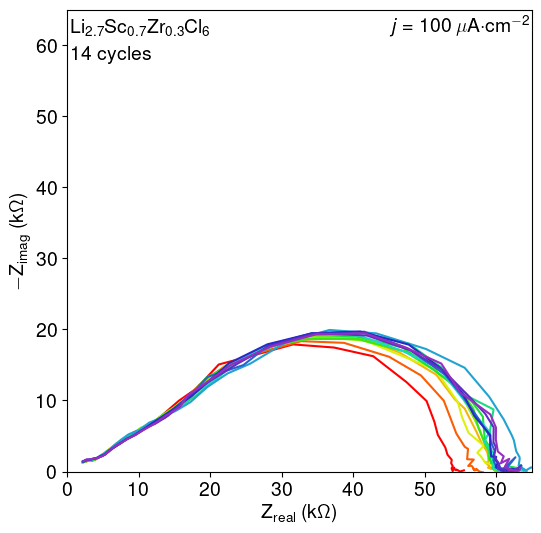

In [94]:
# generates plot
fig, eis_plot = plt.subplots(1, 1, figsize=(6,6))

# plot each EIS cycle
for i in PEIS_cycles:
    eis_plot.plot(PEIS_cycles[i]["Re(Z)"], PEIS_cycles[i]["-Im(Z)"], color = colors_eis[i].hex)

# set axis labels
eis_plot.set_ylabel("$-$Z$_{\mathrm{imag}}$ (k$\Omega$)")
eis_plot.set_xlabel("Z$_{\mathrm{real}}$ (k$\Omega$)")

# set axis limits
eis_plot.set_xlim(0, 65000)
eis_plot.set_ylim(0, 65000)

# set x-axis to 10^3 scale
eis_plot.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
#eis_plot.text(12000, -350, r"$\times 10^3$", color="black")
xticks = eis_plot.xaxis.get_major_ticks()
#xticks[6].label1.set_visible(False)
#xticks[6].set_visible(False)

# set y-axis to 10^3 scale
eis_plot.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
#eis_plot.text(-1300, 7700, r"$\times 10^3$", color="black")
yticks = eis_plot.yaxis.get_major_ticks()
#yticks[8].label1.set_visible(False)
#yticks[8].set_visible(False)

# set title
eis_plot.text(500, 61800, "Li$_{2.7}$Sc$_{0.7}$Zr$_{0.3}$Cl$_6$")

# add text for number of cycles
eis_plot.text(500, 58000, "14 cycles")

# add text for current density
eis_plot.text(45000, 61800, "$j=100$ $\mu$A$\cdot$cm$^{-2}$")

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/cell6_EIS_new.png",bbox_inches='tight',dpi=1000) 